In [28]:
# import warnings
# warnings.filterwarnings("ignore")
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns
# from neuralprophet import NeuralProphet

In [29]:
!pip install seaborn



In [30]:
# cpi=pd.read_csv("inflation-of-consumer-prices.csv")
# cpi.head()

In [31]:
# country="India"
# data=cpi[cpi["Entity"]==country].sort_values("Year")
# cp=data['Inflation, consumer prices (annual %)']
# years = pd.to_datetime(data["Year"], format="%Y")
# cp.head()
# cp.tail()
# plt.plot(years, cp)
# values=pd.DataFrame({"infl":cp,"years":years})
# print(values.iloc[:64])

In [32]:
# df = cpi.loc[cpi["Entity"] == "India", ["Year", "Inflation, consumer prices (annual %)"]].copy()
# df=cpi.rename(columns={'Year':'ds','Inflation, consumer prices (annual %)':'y'})

In [33]:
# df["y"] = pd.to_numeric(df["y"], errors="coerce")
# df.dropna(subset=["y"], inplace=True)
# df["ds"] = pd.to_datetime(df["ds"], format="%Y")
# df.sort_values("ds", inplace=True)
# df.drop_duplicates(subset="ds", keep="last", inplace=True)



In [34]:
# plt.plot(df["ds"],df["y"])

# plt.show()

In [35]:

# m = NeuralProphet()
# df_train, df_val = m.split_df(df, freq="Y", valid_p=0.2)
# metrics = m.fit(df_train, freq="Y", validation_df=df_val)





In [36]:
# future = m.make_future_dataframe(df, periods=10)
# forecast = m.predict(future)
# forecast


In [37]:
# m.plot(forecast)
# m.plot_components(forecast)


In [38]:
# from neuralprophet import NeuralProphet
# import pandas as pd

# cpi = pd.read_csv("inflation-of-consumer-prices.csv")
# country = "India"
# data = cpi.loc[cpi["Entity"] == country, ["Year", "Inflation, consumer prices (annual %)"]].copy()


# df = data.rename(columns={"Year": "ds", "Inflation, consumer prices (annual %)": "y"})
# df["ds"] = pd.to_datetime(df["ds"], format="%Y")
# df["y"]  = pd.to_numeric(df["y"], errors="coerce")


# df = (df.groupby("ds", as_index=False)["y"].mean()
#         .sort_values("ds")
#         .dropna())




# m = NeuralProphet()
# df_train, df_val = m.split_df(df, freq="Y", valid_p=0.2)
# metrics = m.fit(df_train, freq="Y", validation_df=df_val)

# # 5) Forecast next 10 years only
# future = m.make_future_dataframe(df, periods=10, n_historic_predictions=False)
# forecast = m.predict(future)

# # 6) Plot
# m.plot(forecast)


In [39]:
import warnings
import numpy as np
from neuralprophet import NeuralProphet
warnings.filterwarnings("ignore")
import pandas as pd
from scipy import linalg
from matplotlib import pyplot as plt
cpi=pd.read_csv("inflation-of-consumer-prices.csv")
cpi.head()

,Entity,Code,Year,"Inflation, consumer prices (annual %)"
0,Australia,AUS,1960,3.728814
1,Austria,AUT,1960,1.945749
2,Belgium,BEL,1960,0.299467
3,Bolivia,BOL,1960,11.533153
4,Burkina Faso,BFA,1960,7.788162


In [40]:
country="United States"
data=cpi[cpi["Entity"]==country].sort_values("Year")
years=pd.to_datetime(data["Year"], format="%Y")
data.iloc[:,3].std()


2.74300965751771

3.757704476461538
2.74300965751771
6.500714133979248


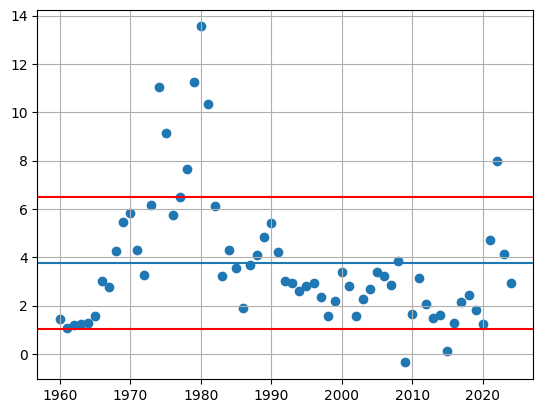

             Entity Code  Year  Inflation, consumer prices (annual %)
1290  United States  USA  1974                              11.054805
1398  United States  USA  1975                               9.143147
1619  United States  USA  1977                               6.501684
1731  United States  USA  1978                               7.630964
1841  United States  USA  1979                              11.254471
1955  United States  USA  1980                              13.549202
2078  United States  USA  1981                              10.334715
6652  United States  USA  2009                              -0.355546
7867  United States  USA  2015                               0.118627
9219  United States  USA  2022                               8.002800


In [41]:
avg=data.iloc[:,3].mean()
sd=data.iloc[:,3].std()
print(avg)
print(sd)
print(avg+sd)
plt.scatter(years, data.iloc[:,3])
plt.axhline(avg)
plt.axhline(sd+avg,color="red")
plt.axhline(avg-sd,color="red")
plt.grid(True)
plt.show()
up=avg+sd
down=avg-sd
outliers=data[(data["Inflation, consumer prices (annual %)"]>up)|(data["Inflation, consumer prices (annual %)"]<down)]
print(outliers)

In [42]:
data_outlier=data.copy()
outlier_rep=((data_outlier["Inflation, consumer prices (annual %)"]>up)|(data_outlier["Inflation, consumer prices (annual %)"]<down))
outlier_years = data_outlier.loc[outlier_rep, "Year"].values
data_outlier.loc[outlier_rep, "Inflation, consumer prices (annual %)"]=np.nan
data_outlier

,Entity,Code,Year,"Inflation, consumer prices (annual %)"
63,United States,USA,1960,1.457976
130,United States,USA,1961,1.070724
199,United States,USA,1962,1.198773
268,United States,USA,1963,1.239669
342,United States,USA,1964,1.278912
...,...,...,...,...
8842,United States,USA,2020,1.233584
9031,United States,USA,2021,4.697859
9219,United States,USA,2022,NaN
9405,United States,USA,2023,4.116338


In [43]:

y=data_outlier["Inflation, consumer prices (annual %)"].values
indices_known=np.where(~np.isnan(y))[0]
indices_unknown=np.where(np.isnan(y))[0]
I=np.eye(len(y))
S1=I[:, indices_known]
S2=I[:, indices_unknown]
x_known = y[indices_known].reshape(-1, 1)
n = len(y)
D = np.zeros((n - 2, n))
for i in range(n - 2):
    D[i, i] = 1
    D[i, i + 1] = -2
    D[i, i + 2] = 1
A = np.dot(D, S2)
b_vec = -np.dot(D, np.dot(S1, x_known))
vhat = linalg.lstsq(A, b_vec)[0]
y_filled = y.copy()
y_filled[indices_unknown] = vhat.flatten()


In [44]:
clean_data=data.copy()
clean_data["Inflation, consumer prices (annual %)"]=y_filled
clean_data

,Entity,Code,Year,"Inflation, consumer prices (annual %)"
63,United States,USA,1960,1.457976
130,United States,USA,1961,1.070724
199,United States,USA,1962,1.198773
268,United States,USA,1963,1.239669
342,United States,USA,1964,1.278912
...,...,...,...,...
8842,United States,USA,2020,1.233584
9031,United States,USA,2021,4.697859
9219,United States,USA,2022,5.178947
9405,United States,USA,2023,4.116338


In [45]:
df=clean_data[["Year", "Inflation, consumer prices (annual %)"]].copy()
df.rename(columns={"Year":"ds","Inflation, consumer prices (annual %)":"y"},inplace=True)
df

,ds,y
63,1960,1.457976
130,1961,1.070724
199,1962,1.198773
268,1963,1.239669
342,1964,1.278912
...,...,...
8842,2020,1.233584
9031,2021,4.697859
9219,2022,5.178947
9405,2023,4.116338


In [46]:
df["ds"]=pd.to_datetime(df["ds"],format="%Y")
df

,ds,y
63,1960-01-01,1.457976
130,1961-01-01,1.070724
199,1962-01-01,1.198773
268,1963-01-01,1.239669
342,1964-01-01,1.278912
...,...,...
8842,2020-01-01,1.233584
9031,2021-01-01,4.697859
9219,2022-01-01,5.178947
9405,2023-01-01,4.116338


In [47]:
df["y"].std()

1.8139333569337817

In [48]:

m = NeuralProphet(epochs=300)
df_train,df_val=m.split_df(df, freq="Y", valid_p=0.2)
metrics=m.fit(df_train, freq="Y", validation_df=df_val)


INFO - (NP.df_utils._infer_frequency) - Major frequency YS corresponds to 98.462% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - YS
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency YS corresponds to 98.077% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - YS
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProph

Training: |          | 0/? [00:00<?, ?it/s]

WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (7) is too small than the required number                     for the learning rate finder (204). The results might not be optimal.
Finding best initial lr: 100%|██████████| 204/204 [00:01<00:00, 114.08it/s]


Training: |          | 0/? [00:21<?, ?it/s, v_num=100, MAE_val=1.360, RMSE_val=1.450, Loss_val=0.0951, RegLoss_val=0.000, train_loss=0.0185, reg_loss=0.000, MAE=0.551, RMSE=0.681, Loss=0.0172, RegLoss=0.000]


In [49]:
train_losses = metrics["Loss"].dropna()
val_losses = metrics["Loss_val"].dropna()

# --- Compute statistics ---
mean_train = np.mean(train_losses)
mean_val = np.mean(val_losses)
std_train = np.std(train_losses)
std_val = np.std(val_losses)

# --- Compute final epoch losses ---
final_train = train_losses.iloc[-1]
final_val = val_losses.iloc[-1]

print(f"Mean Train Loss: {mean_train:.4f} ± {std_train:.4f}")
print(f"Mean Val Loss:   {mean_val:.4f} ± {std_val:.4f}")
print(f"Final Train Loss: {final_train:.4f}")
print(f"Final Val Loss:   {final_val:.4f}")

# --- Compare using data-driven rule ---
# Overfitting: validation loss > train mean + 2×train std
# Underfitting: both losses are high and nearly equal
# Well-fitted: validation within 1×train std of train mean

if final_val > mean_train + 2 * std_train:
    print("\n⚠️ Overfitting detected — validation loss significantly higher than training mean.")
elif final_train > mean_val + 2 * std_val:
    print("\n⚠️ Underfitting detected — model not fitting training data adequately.")
elif abs(final_val - final_train) <= std_val:
    print("\n✅ Model is well-fitted — validation loss within expected variation range.")
else:
    print("\nℹ️ Model moderately fitted — borderline case; minor tuning may help.")

Mean Train Loss: 0.0401 ± 0.0528
Mean Val Loss:   0.1318 ± 0.1508
Final Train Loss: 0.0172
Final Val Loss:   0.0951

✅ Model is well-fitted — validation loss within expected variation range.


In [50]:
future=m.make_future_dataframe(df, periods=10)
forecast=m.predict(future)
forecast

INFO - (NP.df_utils._infer_frequency) - Major frequency YS corresponds to 98.462% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - YS
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency YS corresponds to 90.0% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - YS
INFO - (NP.df_utils._infer_frequency) - Major frequency YS corresponds to 90.0% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - YS


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 328.78it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


,ds,y,yhat1,trend,season_yearly
0,2025-01-01,None,3.679053,-0.804760,4.483813
1,2026-01-01,None,3.712121,-0.757155,4.469275
2,2027-01-01,None,3.743264,-0.709550,4.452815
3,2028-01-01,None,3.772722,-0.661945,4.434667
4,2029-01-01,None,3.870051,-0.614210,4.484261
5,2030-01-01,None,3.902768,-0.566605,4.469373
6,2031-01-01,None,3.933679,-0.519000,4.452679
7,2032-01-01,None,3.963295,-0.471395,4.434690
8,2033-01-01,None,4.060414,-0.423660,4.484074
9,2034-01-01,None,4.093161,-0.376055,4.469216


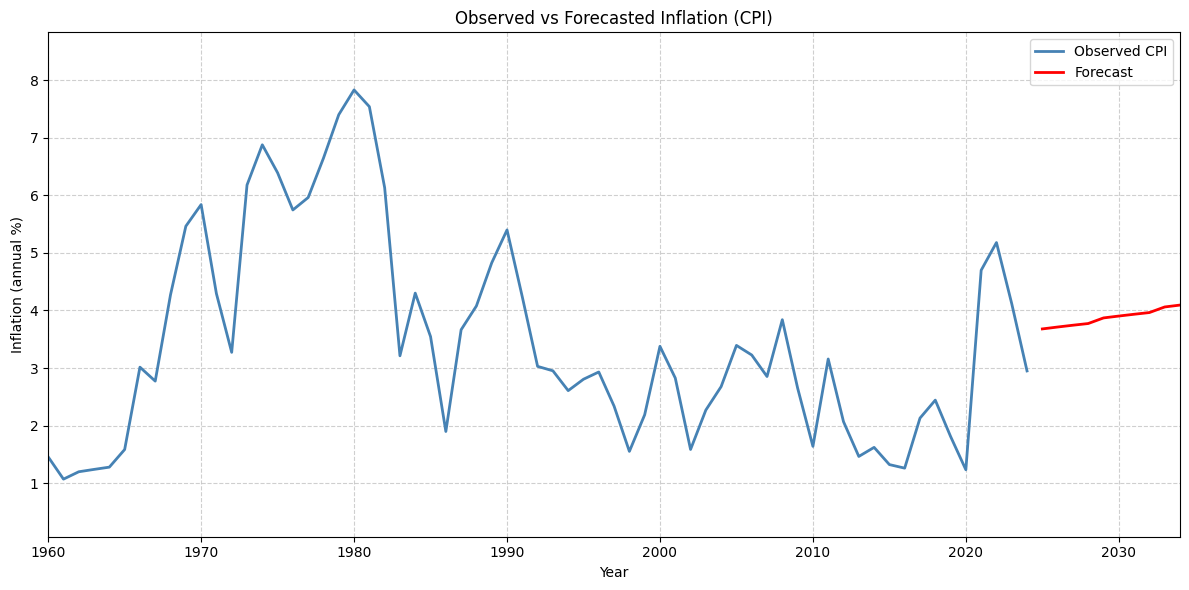

In [ ]:
plt.figure(figsize=(12,6))


plt.plot(df["ds"], df["y"], label="Observed CPI", color="steelblue", linewidth=2)


plt.plot(forecast["ds"], forecast["yhat1"], label="Forecast", color="red", linewidth=2)

plt.xlabel("Year")
plt.ylabel("Inflation (annual %)")
plt.title("Observed vs Forecasted Inflation (CPI)")

plt.xlim(df["ds"].min(), forecast["ds"].max())
plt.ylim(df["y"].min() - 1, df["y"].max() + 1)

plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [52]:
data

,Entity,Code,Year,"Inflation, consumer prices (annual %)"
63,United States,USA,1960,1.457976
130,United States,USA,1961,1.070724
199,United States,USA,1962,1.198773
268,United States,USA,1963,1.239669
342,United States,USA,1964,1.278912
...,...,...,...,...
8842,United States,USA,2020,1.233584
9031,United States,USA,2021,4.697859
9219,United States,USA,2022,8.002800
9405,United States,USA,2023,4.116338


#try

In [53]:
# m = NeuralProphet(
#     # Use default number of change trendpoints (10)
   
#     # Disable seasonality components
#     yearly_seasonality=False,
#     weekly_seasonality=False,
#     daily_seasonality=False,
# )
# m.set_plotting_backend("matplotlib")  # Use matplotlib due to #1235
# metrics = m.fit(df)
# forecast = m.predict(df)
# m.plot(forecast)

In [54]:
# m.plot_parameters(components=["trend"])

